# Computer Project #2

A cylindrical fuel rod of radius $R$ is cooled by fluid around it, with heat transfer coefficient $h$. Consider the rod to be infinite in the $z$ direction. The bulk coolant temperature is $T_{b0}$. The fuel element is made of UO2 ($R=0.5$ cm). Density = 10.75 g/cm^3, k = 2 W/(m-K), Cp = 84 J/(mol-K).

## ANALYTICAL SOLUTION

(a) Find the steady-staate temperature distribution for $t<0$, $T_{i}(r)$, in the fuel rod due to ta sparially uniform heat generation term of $\dot{q}_{0}$ (W/cm^3). What value of $\dot{q}_{0}$ (in kW/m^3) will lead to the maximum temperature in the fuel rod to be 700 C?  

Use the value of $\dot{q}_{0}$ in the rest of this project. Plot temperature of the radial coodinate.

(answer)  
From given problem statement, we first need to consider the steady state. The heat conduction equation at the steady state is described as
$$
\frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} = 0
$$
where boundary conditions:
$$
\text{BC1 (symmetry) : } T = finite \text{ at } r =0 
$$

$$
\text{BC2 (convection) : } -k \frac{dT}{dr}|_{r=R} = h(T(R)-T_{b0})
$$


Solve for $T(r)$:
$$
\begin{align*}
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} &= 0\\ 
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) &= -  \frac{\dot{q}_{0}}{k}\\
 \frac{d}{dr}(r \frac{dT}{dr}) &= - \frac{\dot{q}_{0}r}{k}
\end{align*}
$$

Integrate both hand sides for $r$:

$$
\begin{align*}
 r \frac{dT}{dr} &= - \frac{\dot{q}_{0}r^2}{2k} + C_{1}\\
 \frac{dT}{dr} &= - \frac{\dot{q}_{0}r}{2k} + \frac{C_{1}}{r}
\end{align*}
$$

Integrate both hand sides again:

$$
    T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{1}\ln{r} + C_{2}
$$

From the BC1, the coefficient $C_{1} = 0$. Hence,
$$
T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{2}
$$

Apply the BC2, the $C_{2}$ is expressed as:
$$
C_{2} = \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Therefore, $T(r)$ is

$$
T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Since the geometry is a cylindrical and the heat generation is uniform, the centerline ($r=0$) goes to the maximum temperature.  
Substitute $r=0$ and $T(r=0)=700$ C for finding $\dot{q}_{0}$:

$$
(-\frac{R}{2h} + \frac{R^2}{4k})\dot{q}_{0} = T(r=0) - T_{b0} (=400)
$$

Solve for $\dot{q}_{0}$:
$$
\dot{q}_{0} = 125764.2 \text{  ($\rm kW/m^3$) }
$$

The following cells show the plot of the temperature distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
''' 
define given parameters
'''
R = 0.5 # radius of fuel [cm]
rho = 10.75 # density of fuel [kg/m^3]
k = 0.02 # thermal conductivity of fuel [W/m-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

h = 4.5 # [W/m^2-K]
Tb0 = 300 # [K]
q0 = 125  # [W/cm^3]

tau, m = 0.02, 0.02

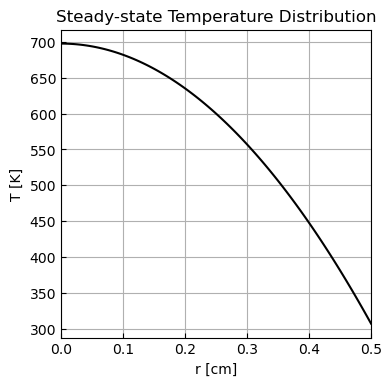

In [3]:
# T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
def T(r):
    return -q0 * r**2 / (4*k) + q0 * R / (2*h) + q0 * R**2 / (4*k) + Tb0

# plot T(r) vs r
r = np.linspace(0, R, 100)
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(r, T(r), 'k-')
ax.set_xlabel('r [cm]')
ax.set_ylabel('T [K]')
ax.set_title('Steady-state Temperature Distribution')
ax.grid(True)
ax.set_xlim(0, R)
plt.show()

(b) Assuming $h$ remains constant, the heat generation rate and the bulk coolant temperature start to change at $t=0$ with time as $\dot{q}(t)$ and $T_{b}(t)$. For $t>0$, find the anauytical expression for the temperature distribution in the fuel rod $T(r,t)$. Use the temperature distribution found in part (a) as your initial condition at $t=0$.

A cylindrical fuel rod of radius R is cooled by fluid around it, with heat transfer coefficient h. Consider
the rod to be infinite in the z direction. The bulk coolant temperature is Tb0. The fuel element is made
of UO2 (R = 0.5 cm). [Density = 10.75 g/cm3; k = 2 W/(m‐K); Cp = 84 J/(mol‐K)]. Pay attention to the
units.

$$
\dot{q}(t) = \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})
$$

$$
\dot{T}_{b}(t) = \frac{T_{b0}}{2}(1 + e^{- m t})
$$

## B. NUMERICAL SOLUTION

Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit
in time). Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)

(i) Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(ii) Also, convince the reader that the time step you used for each solution is small enough but not
unnecessarily small. [Carry out a time step refinement study to determine adequate time steps for
each simulation.]

(iii) Plot the converged analytical and numerical solutions for each ti and compare them.

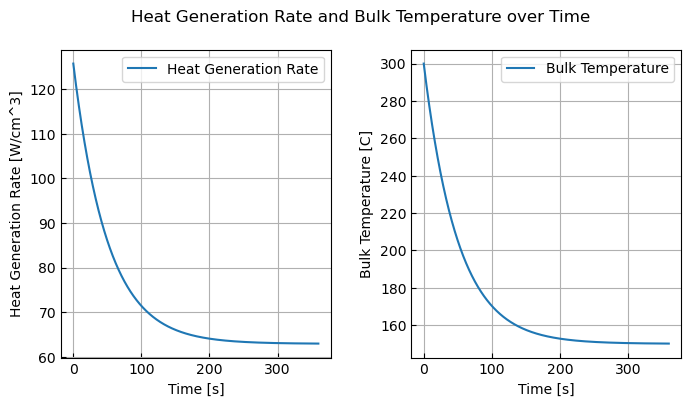

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time

# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
m = 0.02 # parameter for bulk temperature 
initial_cylinder_temp = 700  # initial cylinder temperature [K]
eta = 0.02 # parameter for heat generation

# Radial coordinates
r = np.linspace(0, R, 100)

# Heat generation rate function [W/cm^3]
def q(q_dot_0, eta, t):
    """Calculate the heat generation rate over time."""
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function [C]
def Tb(Tb0, m, t):
    """Calculate the bulk temperature over time."""
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Plotting heat generation rate and bulk temperature over time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t_values = np.linspace(0, 360, 5000)
ax[0].plot(t_values, q(q_dot_0, eta, t_values), label='Heat Generation Rate')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_values, Tb(Tb0, m, t_values), label='Bulk Temperature')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [C]')
ax[1].grid(True)
ax[1].legend()

fig.suptitle('Heat Generation Rate and Bulk Temperature over Time')
plt.show()

### Answer (a)

### Finite Difference Formula
For each interior grid point $i$ where $1 \leq i \leq N_{r}-1$ and each time step $n$ where $0 \leq n \leq n_{t}$, the temperature $T$ is updsated using the formulara:
$$
T_{i, n+1} = T_{i, n} + \Delta t \left( \frac{k}{\rho \cdot Cp} \left( \frac{T_{i+1, n} - 2T_{i, n} + T_{i-1, n}}{\Delta r^2} + \frac{1}{r_i} \frac{T_{i+1, n} - T_{i-1, n}}{2 \Delta r} \right) + \frac{\dot{q}(t_n)}{\rho \cdot Cp} \right)
$$
where:
- $T_{i, n}$ is the temperature at grid point $i$ and time step $n$.
- $\Delta t$ is the time step size.
- $k$ is the thermal conductivity.
- $\rho$ is the density.
- $Cp$ is the specific heat capacity.
- $\Delta r$ is the radial step size.
- $r_i$ is the radial position corresponding to grid point $i$.
- $\dot{q}(t_n)$ is the heat generation rate at time $t_{n}$.

### Boundary Conditions

- At the center of the rod (symmetry condition): $T_{0, n+1} = T_{1, n+1}$
- At the outer surface of the rod (convective boundary condition): $T_{N_{r}, n+1} = T_{N_{r} - 1, n+1} + \Delta r \cdot \frac{h}{k} \cdot (T_{b}(t_{n+1}) - T_{N_{r} - 1, n+1})$



### Explanation

- The finite difference formula includes both diffusion (first term inside the parentheses) and radial contribution (second term inside the parentheses) due to the cylindrical geometry.
- The $\frac{1}{r_i} \frac{T_{i+1, n} - T_{i-1, n}}{2 \Delta r}$ term accounts for the radial variation in the cylindrical coordinate system.
- The term $\frac{\dot{q}(t_n)}{\rho \cdot Cp}$ represents the internal heat generation in the rod.
- The boundary conditions ensure that the symmetry at the center and convective heat transfer at the surface are properly modeled.

In [5]:
# Finite difference solution

def solve_heat_equation(Nr, Nt, T_end):
    dr = R / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, R, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    # Initialize T using zeros
    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            # Finite difference scheme
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) + 
                q(q_dot_0, eta, t_values[n]) / (rho * cp)
            )
        # Boundary conditions
        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(Tb0, m, t_values[n + 1]) - T[Nr - 1, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

In order to find the appropriate grid size in spatial domain, a mesh refinement study was performed. In this study, the fixed time step $dt=0.0002$ was employed.  
To ensure the enough convergence, Root-Mean Squared Errors (RMSE) and Mean-Squared Errors (MSE) were computed between the temperature distributions at the current meshsize and last meshsize. Also, the final time of transient was set to $1$ second.

In [19]:
# Mesh refinement study with error metrics
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1):

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1], label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (K)')
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()

In [22]:
'''
set up the mesh refinement study 
'''
Nr_values = [15, 30, 50, 100, 200, 300, 310]
Nt = 5000
T_end = 1

The computed RMSE and MAE for each mesh are listed in the following cell; it shows that in the setting of grid size being 310, error metrics repersent enough convergence less than 10\%. 

Nr=30: RMSE=26.091154572390707, MAE=17.892518860538193, dr=0.0167, dt=0.0002
Nr=50: RMSE=9.880545034260214, MAE=6.5467866538841575, dr=0.0100, dt=0.0002
Nr=100: RMSE=7.110013795366673, MAE=4.615546169804728, dr=0.0050, dt=0.0002
Nr=200: RMSE=3.468399514198673, MAE=2.224679915098679, dr=0.0025, dt=0.0002
Nr=300: RMSE=1.1445930781280544, MAE=0.7305329180871615, dr=0.0017, dt=0.0002
Nr=310: RMSE=0.07505771489089916, MAE=0.048184587124735036, dr=0.0016, dt=0.0002


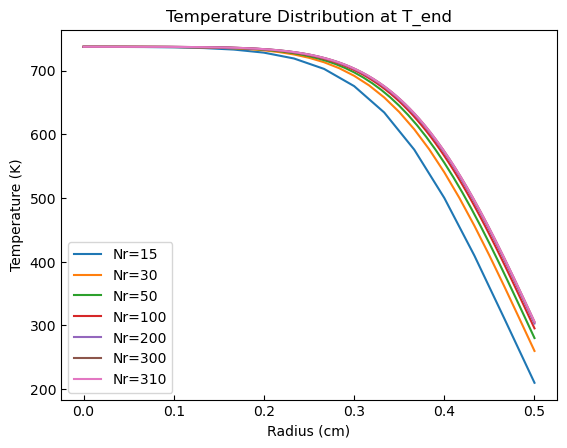

In [23]:
mesh_refinement_study(Nr_values, Nt, T_end)

In addition to the error metrics, convergence check was performed. As shown in the cell below, the temperatures at $r=0.01$ was computed for several mesh size defined in the previous setup (i.e., [15, 30, 50, 100, 200, 300, 310]). 
It represents that 
- Number of grid [15, 30, 50, 100]: the temperature changes drastically respecting to that number.
- Regions where it exceeds 100, the difference is moderated and approached to flat.

Based on these discussions, the adequent number of grid points is 100 in this study.

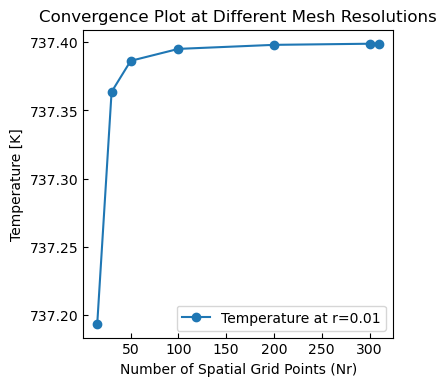

In [17]:
# Choose the radial coordinate for convergence comparison
convergence_radius = 0.01

# Initialize arrays to store temperatures at the chosen radial coordinate for each Nr
temperature_at_convergence = []

for Nr in Nr_values:
    r_values, t_values, T, _, _ = solve_heat_equation(Nr, Nt, T_end)
    
    # Find the index corresponding to the chosen radial coordinate
    r_index = np.abs(r_values - convergence_radius).argmin()
    
    # Store the temperature at the chosen radial coordinate for the last time step
    temperature_at_convergence.append(T[r_index, -1])

# Plot the convergence results
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Nr_values, temperature_at_convergence, marker='o', linestyle='-', label=f'Temperature at r={convergence_radius}')
ax.set_xlabel('Number of Spatial Grid Points (Nr)')
ax.set_ylabel('Temperature [K]')
ax.set_title('Convergence Plot at Different Mesh Resolutions')
ax.legend()
plt.show()

### Answer (b)

To convince the reader that the time step I used for each solution is small enough but not unecessarily small, the effect of time step on the temperature distribution was studied.  
In this study, the appropriate time step was decided for each spacial grid size based on the Courant-Friedrichs-Lewy (CFL) number.

The CFL condition is a crucial concept in the numerical analysis of partial differential equations, particularly when using finite difference methods for time-dependent problems. It's a stability criterion that must be satisfied to ensure the stability of cerrtain types of  numerical schemes, like explicit methods, for solving partial differential equations.  

In a cylindrical geometry, the FCFL condition for heat transfer problems typically relates the thermal diffusivity, the radial discretization $\Delta r$ and the time step $\Delta t$. The CFL number for heat conduction in cylindrical coordinates can be expressed as:
$$
\text{CFL} =\frac{\alpha \Delta t}{(\Delta r)^2}
$$
In this study, the time step $\Delta t$ is decided to fulfill CFL=0.5.

In [25]:
''' 
set up the time refinement study 
'''
max_stable_dt_values = [] 

# Implement the stability analysis function calculate_max_stable_dt
def calculate_max_stable_dt(Nr):
    # CFL number (adjust as needed, typically a fraction like 0.5)
    CFL = 0.5

    # Spatial grid spacing
    dr = R / Nr

    # Maximum stable time step based on CFL condition
    max_stable_dt = CFL * dr**2 / k

    return max_stable_dt

for Nr in Nr_values:
    max_stable_dt = calculate_max_stable_dt(Nr)  # Implement a function to calculate max stable dt
    max_stable_dt_values.append(max_stable_dt)

The relationship between the number of spatial grid points and the appropriate time step is indicated in the cell below.  
The computed appropriate time steps are also shown.

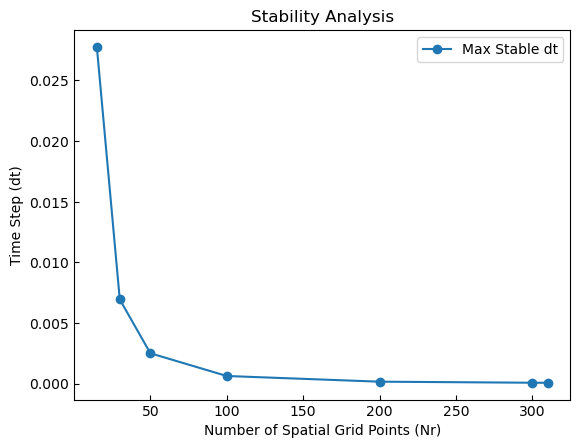

max stable dt=[0.027777777777777776, 0.006944444444444444, 0.0025, 0.000625, 0.00015625, 6.944444444444446e-05, 6.503642039542144e-05]


In [31]:
plt.plot(Nr_values, max_stable_dt_values, marker='o', linestyle='-', label='Max Stable dt')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Time Step (dt)')
plt.title('Stability Analysis')
plt.legend()
plt.show()

print(f'max stable dt={max_stable_dt_values}')

In addition, the effect of time step on the computational time was studied with a fixed spatial number of grid = 310.  

In [32]:
# Updated function to study the effect of dt with computation time
def study_dt_effect(Nr_fixed, dt_values, T_end):


    computation_times = []  # To store computation times for each dt

    for dt in dt_values:
        Nt = int(T_end / dt)  # Calculate the number of time steps based on dt

        # Measure computation time
        start_time = time.time()
        _, _, _, _, _ = solve_heat_equation(Nr_fixed, Nt, T_end)
        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)

    # Plot dt_values vs computational time
    plt.plot(dt_values, computation_times, marker='o', linestyle='-')
    plt.xlabel('dt Values')
    plt.ylabel('Computation Time (seconds)')
    plt.xscale('log')
    plt.title(f'Computational Time vs dt for Nr={Nr_fixed}')
    plt.grid(True)
    plt.show()


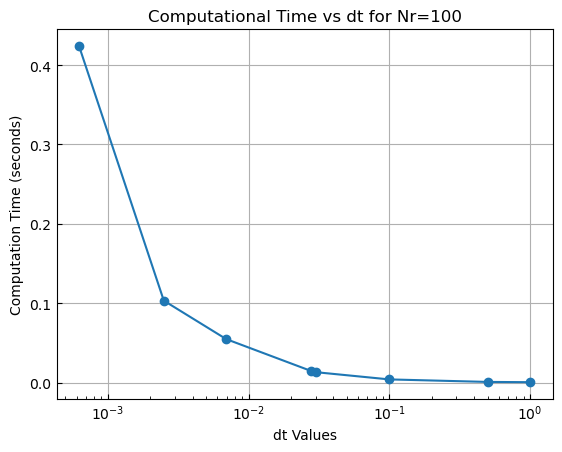

In [39]:
Nr_fixed = 100
dt_values = [1, 0.5, 0.1, 0.03, 0.027777777777777776, 0.006944444444444444, 0.0025, 0.000625]  # Specify the dt values you want to investigate
study_dt_effect(Nr_fixed, dt_values, T_end=1)